In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')
library(ggbump)
library(ggbeeswarm)
library(lubridate)
library(dplyr)
library(tidyr)

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


R[write to console]: Loading required package: timechange

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [4]:
%%R
 
# Import data with R
salinity <- read_csv('./data/river/bronxsalinity.csv', show_col_types = FALSE)
salinity$`datetime` <- as.Date(salinity$`datetime`, format = "%Y/%m/%d %H:%M")
salinity %>% head(4)

# A tibble: 4 × 6
  agency_cd site_no datetime   tz_cd   sal `298316_90860_cd`
  <chr>       <dbl> <date>     <chr> <dbl> <chr>            
1 USGS      1302020 2021-06-28 EST     0.5 A                
2 USGS      1302020 2021-06-28 EST     0.5 A                
3 USGS      1302020 2021-06-28 EST     0.5 A                
4 USGS      1302020 2021-06-28 EST     0.5 A                


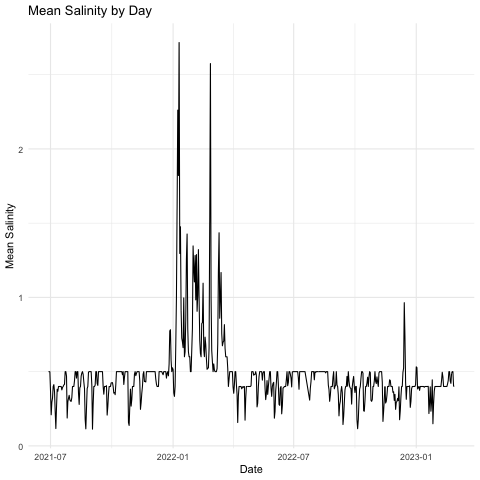

In [9]:
%%R

# group the data by day and calculate the mean of each group
salinity_daily <- salinity %>%
  mutate(date = as.Date(`datetime`)) %>%
  group_by(date) %>%
  summarize(mean_salinity = mean(`sal`))

# create a line chart with the x-axis grouped by day
ggplot(salinity_daily, aes(x = date, y = mean_salinity)) +
  geom_line() +
  labs(x = "Date", y = "Mean Salinity", title = "Mean Salinity by Day") +
  theme_minimal()

In [6]:
%%R
 
# Import data with R
snow <- read_csv('./data/NYC_snow.csv', show_col_types = FALSE)
snow %>% head(4)

# A tibble: 4 × 9
  STATION     NAME          LATIT…¹ LONGI…² ELEVA…³ DATE        PRCP  SNOW  SNWD
  <chr>       <chr>           <dbl>   <dbl>   <dbl> <date>     <dbl> <dbl> <dbl>
1 USW00094728 NY CITY CENT…    40.8   -74.0    42.7 2016-01-01     0     0     0
2 USW00094728 NY CITY CENT…    40.8   -74.0    42.7 2016-01-02     0     0     0
3 USW00094728 NY CITY CENT…    40.8   -74.0    42.7 2016-01-03     0     0     0
4 USW00094728 NY CITY CENT…    40.8   -74.0    42.7 2016-01-04     0     0     0
# … with abbreviated variable names ¹​LATITUDE, ²​LONGITUDE, ³​ELEVATION


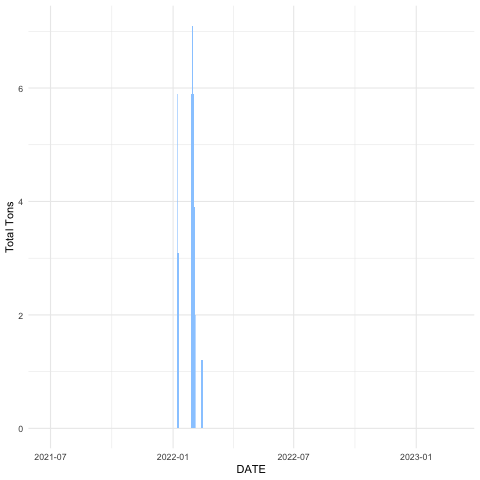

In [7]:
%%R 

ggplot(snow, aes(x = DATE, y = SNWD)) +
  geom_bar(stat = "identity", fill = "#99CCFF") +
  ylab("Total Tons") +
  scale_x_date(limits = as.Date(c("2021-06-28", "2023-02-27"))) +
  theme_minimal()


Saving 6.67 x 6.67 in image


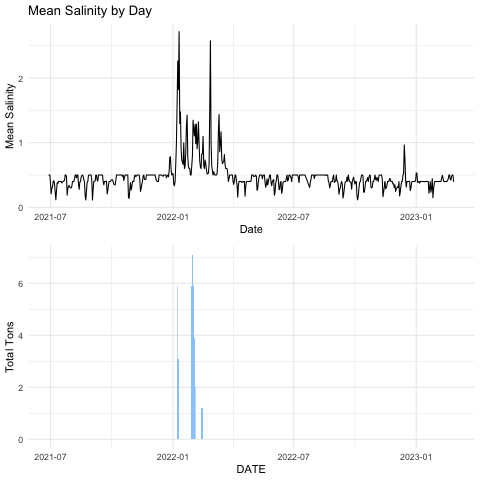

In [13]:
%%R

library(gridExtra)

# create plot1
plot1 <- ggplot(salinity_daily, aes(x = date, y = mean_salinity)) +
  geom_line() +
  labs(x = "Date", y = "Mean Salinity", title = "Mean Salinity by Day") +
  theme_minimal()

# create plot2
plot2 <- ggplot(snow, aes(x = DATE, y = SNWD)) +
  geom_bar(stat = "identity", fill = "#99CCFF") +
  ylab("Total Tons") +
  scale_x_date(limits = as.Date(c("2021-06-28", "2023-02-27"))) +
  theme_minimal()

# combine the plots into one chart
combined_plot <- grid.arrange(plot1, plot2, ncol = 1)

ggsave("./groupchart/salinityvsnow.pdf", combined_plot)